Loading data from: data/data.npz
Found keys in file: ['images', 'states', 'actions', 'text_ids', 'vocab']

========== Analysis: ACTIONS (7500 samples, 4 dims) ==========
Dim   | Min          | Max          | Mean         | Std         
----------------------------------------------------------------------
0     | -0.498605    | 0.467133     | 0.009078     | 0.092288    
1     | -0.060141    | 1.485885     | 0.195930     | 0.351147    
2     | -0.692759    | 0.461184     | -0.021445    | 0.108456    
3     | 0.000000     | 0.000000     | 0.000000     | 0.000000    


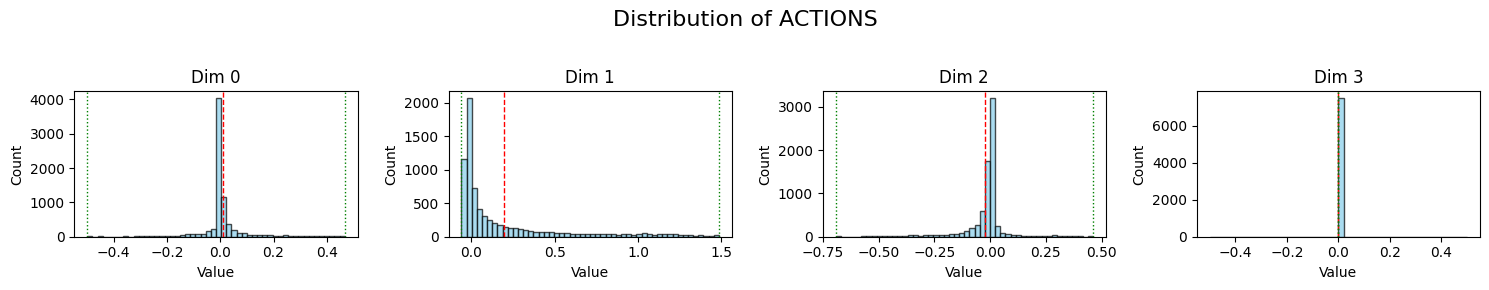


NOTES (ACTIONS):
- If mean is far from 0, consider normalization.
- If std is very small but Min/Max large, inspect outliers.

========== Analysis: STATES (first 9 dims) (7500 samples, 9 dims) ==========
Dim   | Min          | Max          | Mean         | Std         
----------------------------------------------------------------------
0     | -0.095583    | 0.098436     | 0.011269     | 0.057441    
1     | 0.601388     | 0.905978     | 0.815805     | 0.072541    
2     | 0.053582     | 0.288379     | 0.173693     | 0.063400    
3     | 0.996630     | 1.000000     | 0.997484     | 0.000759    
4     | -0.090922    | 0.094938     | 0.009588     | 0.058131    
5     | 0.609091     | 0.699319     | 0.656536     | 0.031000    
6     | 0.019394     | 0.020000     | 0.019422     | 0.000066    
7     | -0.001871    | 0.001709     | 0.000005     | 0.000472    
8     | -0.001759    | 0.001948     | 0.000011     | 0.000375    


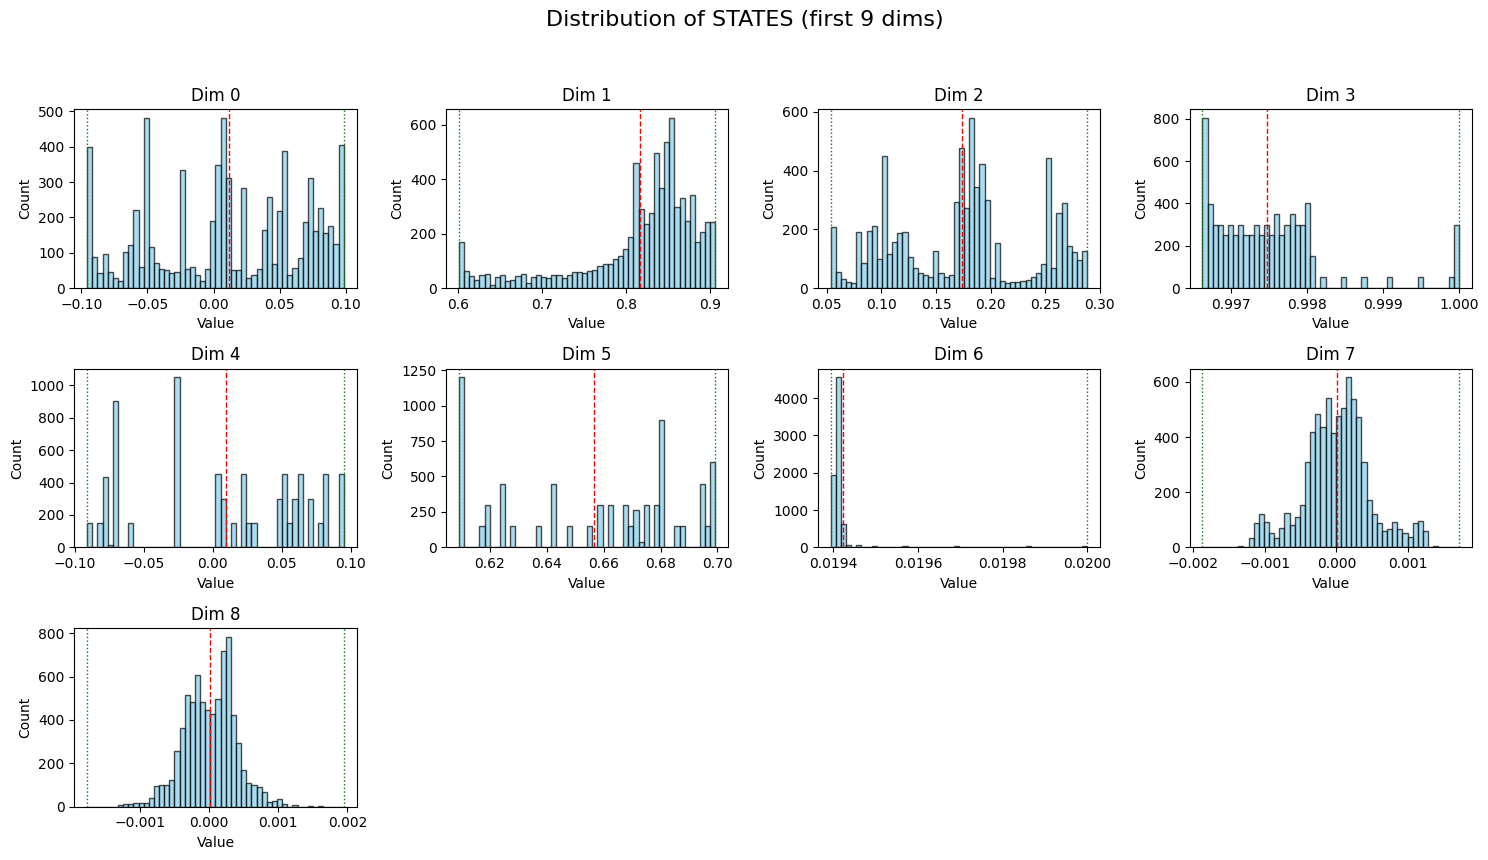

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os


def analyze_distribution(data, name="Data"):
    """
    Plot histograms and print basic statistics for the given data.
    Accepts arrays shaped (N, Dim) or (N,) -> converts to (N, Dim).
    """
    data = np.asarray(data)
    if data.ndim == 1:
        data = data.reshape(-1, 1)

    N, Dim = data.shape
    print(f"\n{'='*10} Analysis: {name} ({N} samples, {Dim} dims) {'='*10}")

    # Basic statistics
    d_min = data.min(axis=0)
    d_max = data.max(axis=0)
    d_mean = data.mean(axis=0)
    d_std = data.std(axis=0)

    print(f"{'Dim':<5} | {'Min':<12} | {'Max':<12} | {'Mean':<12} | {'Std':<12}")
    print("-" * 70)
    for i in range(Dim):
        print(f"{i:<5} | {d_min[i]:<12.6f} | {d_max[i]:<12.6f} | {d_mean[i]:<12.6f} | {d_std[i]:<12.6f}")
        if d_std[i] < 1e-6:
            print(f"WARNING: Dimension {i} appears constant (std < 1e-6)")

    # Plot histograms for up to 12 dimensions to avoid overcrowding
    plot_dims = min(Dim, 12)
    cols = 4
    rows = (plot_dims + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    fig.suptitle(f'Distribution of {name}', fontsize=16)
    axes = np.array(axes).reshape(-1)

    for i in range(plot_dims):
        ax = axes[i]
        ax.hist(data[:, i], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
        ax.set_title(f'Dim {i}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Count')
        # Mean and min/max markers
        ax.axvline(d_mean[i], color='red', linestyle='dashed', linewidth=1)
        ax.axvline(d_min[i], color='green', linestyle='dotted', linewidth=1)
        ax.axvline(d_max[i], color='green', linestyle='dotted', linewidth=1)

    # Hide unused subplots
    for j in range(plot_dims, len(axes)):
        axes[j].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


def main(data_path="data/data.npz"):
    """Load and visualize collected data from a .npz file."""
    if not os.path.exists(data_path):
        print(f"ERROR: File not found: {data_path}")
        return

    print(f"Loading data from: {data_path}")
    raw = np.load(data_path, allow_pickle=True)

    keys = list(raw.files)
    print(f"Found keys in file: {keys}")

    # 1) Actions
    if 'actions' in raw.files:
        actions = np.asarray(raw['actions'])
        # Ensure shape (N, D)
        if actions.ndim == 1:
            actions = actions.reshape(-1, 1)
        analyze_distribution(actions, name="ACTIONS")
        print("\nNOTES (ACTIONS):")
        print("- If mean is far from 0, consider normalization.")
        print("- If std is very small but Min/Max large, inspect outliers.")
    else:
        print("No 'actions' key found in the data file.")

    # 2) States
    if 'states' in raw.files:
        states = np.asarray(raw['states'])
        if states.ndim == 2 and states.shape[1] >= 9:
            analyze_distribution(states[:, :9], name="STATES (first 9 dims)")
        else:
            analyze_distribution(states, name="STATES")
    else:
        print("No 'states' key found in the data file.")


main()